In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\Shantanu\Downloads\marketing_campaign1.xlsx")

df1 = df.copy()

print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
missing_values = df.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_white',
       title = 'Missing Values')
fig.show()

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df1['Income'].fillna(df1['Income'].mean(), inplace=True)

In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Text(0.5, 1.0, 'Income')

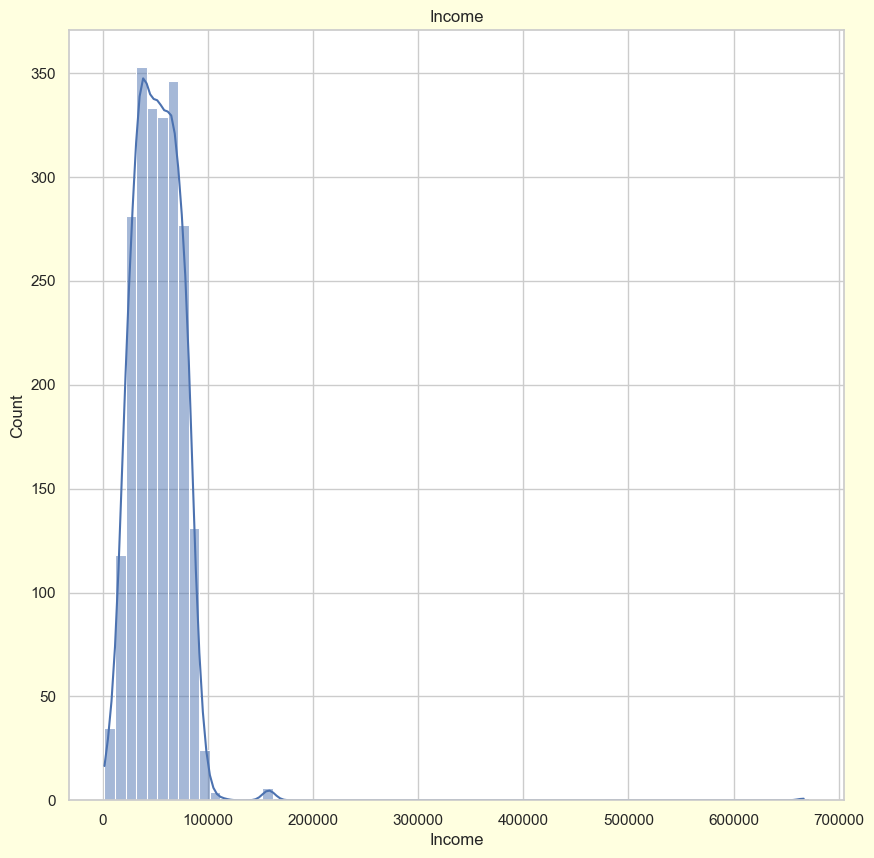

In [11]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.histplot(data=df, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

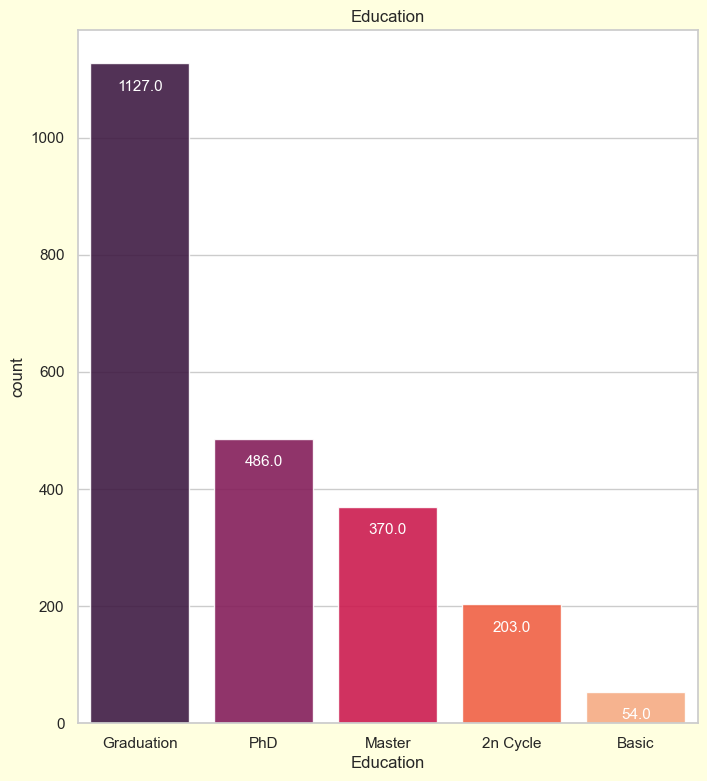

In [12]:
plt.figure(figsize=(8, 9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df, x='Education', saturation=1, alpha=0.9, palette='rocket', order=df['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
 ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

Text(-49, 0, '680816')

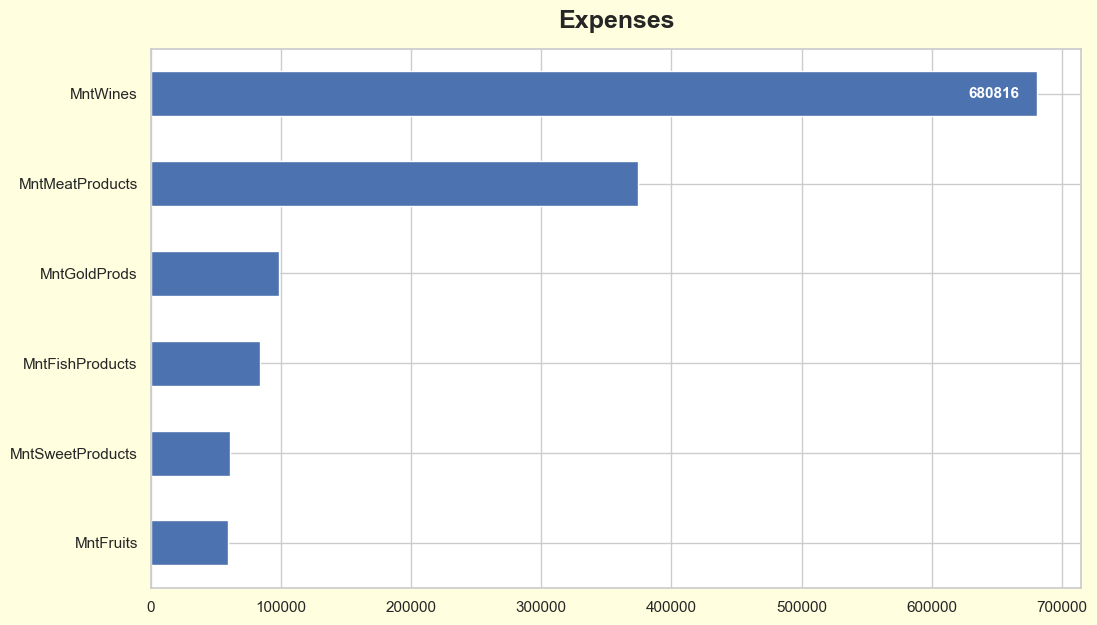

In [13]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

Text(-50, 0, '334')

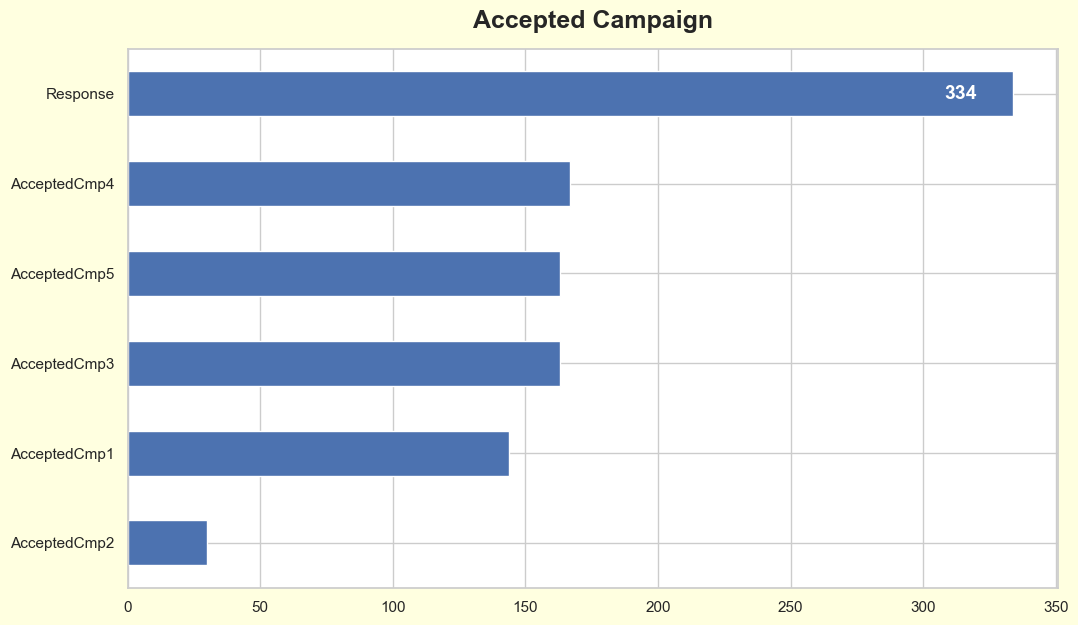

In [14]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaign', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

In [15]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

 "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them.


In [16]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)


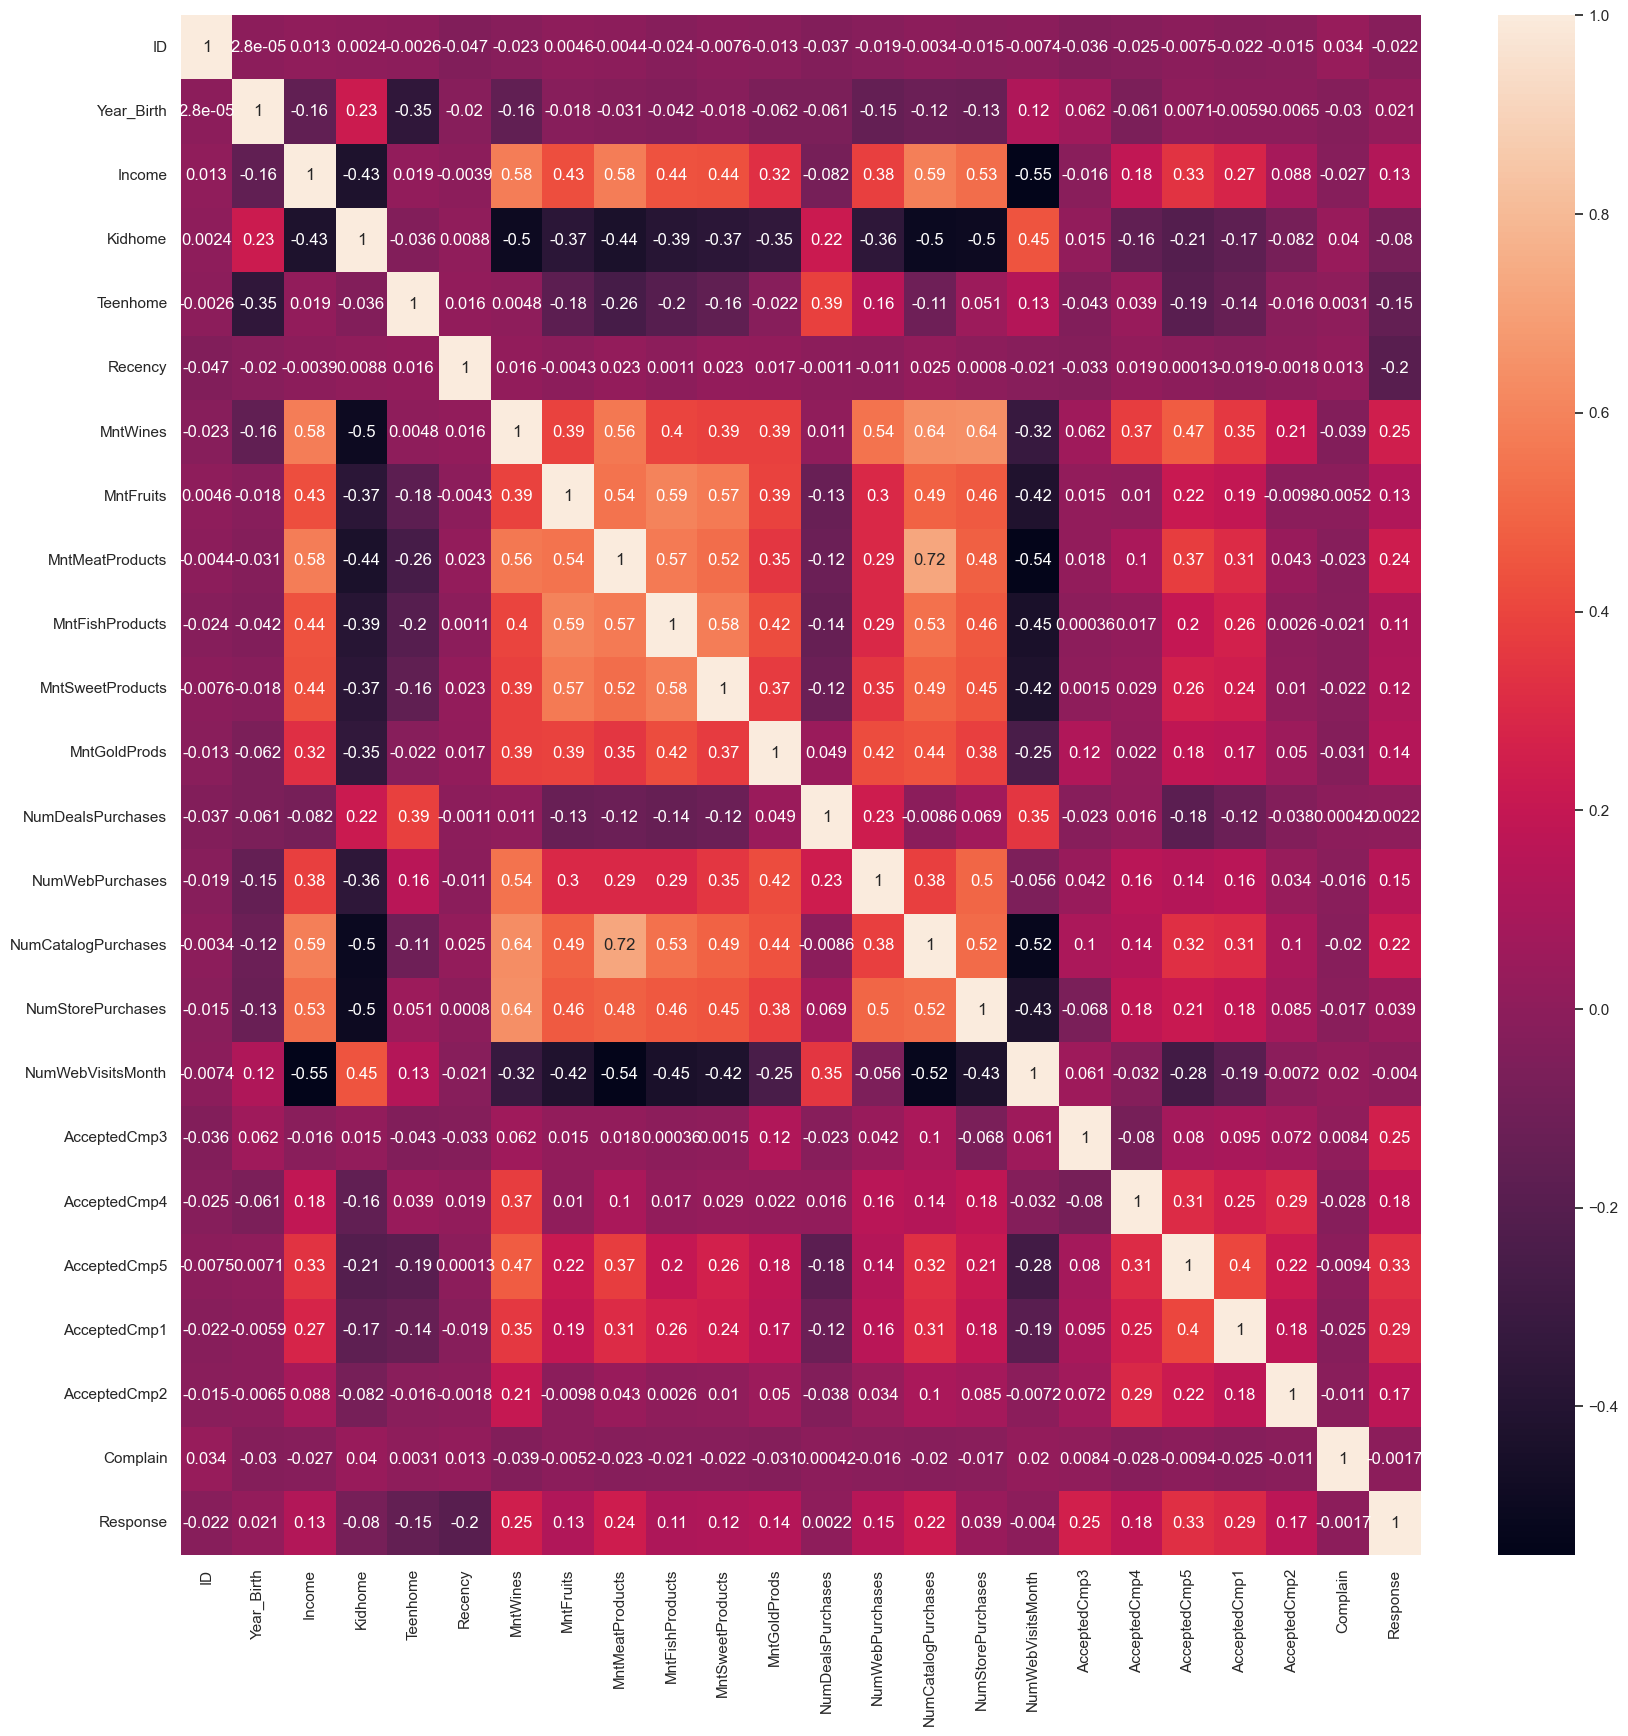

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [19]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [20]:
df['Marital_Status'].value_counts()


relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [21]:
# Combining different dataframe into a single column to reduce the number of dimension
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [22]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,2013-08-21,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,2014-02-10,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,2014-01-19,94,0,1,422,0,19


In [23]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [24]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [25]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
0,5524,1957,PG,Single,58138.0,2012-09-04,58,0,0,1617,1,25,58
1,2174,1954,PG,Single,46344.0,2014-03-08,38,0,2,27,0,6,61
2,4141,1965,PG,relationship,71613.0,2013-08-21,26,0,0,776,0,21,50
3,6182,1984,PG,relationship,26646.0,2014-02-10,26,0,1,53,0,8,31
4,5324,1981,PG,relationship,58293.0,2014-01-19,94,0,1,422,0,19,34


In [27]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [28]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,first_day,day_engaged
0,5524,1957,PG,Single,58138.0,2012-09-04,58,0,0,1617,1,25,58,2015-01-01,849
1,2174,1954,PG,Single,46344.0,2014-03-08,38,0,2,27,0,6,61,2015-01-01,299
2,4141,1965,PG,relationship,71613.0,2013-08-21,26,0,0,776,0,21,50,2015-01-01,498
3,6182,1984,PG,relationship,26646.0,2014-02-10,26,0,1,53,0,8,31,2015-01-01,325
4,5324,1981,PG,relationship,58293.0,2014-01-19,94,0,1,422,0,19,34,2015-01-01,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,PG,relationship,61223.0,2013-06-13,46,0,1,1341,0,18,48,2015-01-01,567
2236,4001,1946,PG,relationship,64014.0,2014-06-10,56,0,3,444,1,22,69,2015-01-01,205
2237,7270,1981,PG,Single,56981.0,2014-01-25,91,0,0,1241,1,19,34,2015-01-01,341
2238,8235,1956,PG,relationship,69245.0,2014-01-24,8,0,1,843,0,23,59,2015-01-01,342


In [29]:
# "Recency", "Complain" columns were dropped before

df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer"],axis=1)
df.shape

(2240, 11)

In [30]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly')
fig.show ()

In [31]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly')
fig.show ()

In [32]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly')
fig.show ()

In [33]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly')
fig.show ()

In [34]:
df.describe()

,Income,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,0.009375,0.950446,605.798214,0.446875,14.862054,46.194196,539.582143
std,25037.797168,28.962453,0.096391,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,19.000000,186.000000
25%,35538.750000,24.000000,0.000000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,49.000000,0.000000,1.000000,396.000000,0.000000,15.000000,45.000000,541.500000
75%,68289.750000,74.000000,0.000000,1.000000,1045.500000,1.000000,21.000000,56.000000,715.000000
max,666666.000000,99.000000,1.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,885.000000


<Axes: >

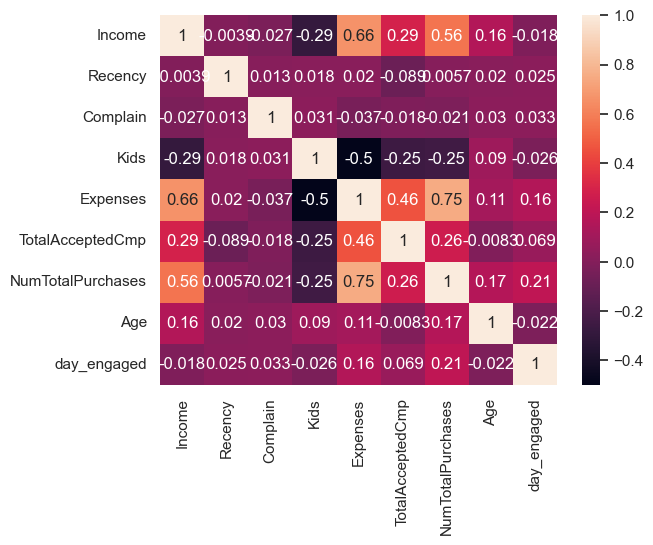

In [35]:
sns.heatmap(df.corr(), annot=True)

In [36]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Complain', 'Kids',
       'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases', 'Age',
       'day_engaged'],
      dtype='object')

In [37]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [38]:
#removing outliers
df1['Age'] = df['Age']

df = df[df.Age < 100]
df = df[df.Income < 120000]

df1 = df1[df1.Age < 100]
df1 = df1[df1.Income < 120000]

## Feature Engineering

### 1. Feature Selection

In [39]:
# As we dont have dependent or target feature we cannot perform univariate
# feature selection or recursive feature elimination

# But we can eliminate the features based on correlation and domain knowledge

# ID column is not going to contribute in deciding clusters

# From EDA we see that Z_CostContact, Z_Revenue contains only single value so the
# feature can be dropped

# Also from EDA we concluded that Dt_customer can be used as days engaged and
# drop original feature

# And from Year_Birth we get new feature age and drop the original one

# Also Kidhome and Teenhome can be combined to single column which is Kids

# Education which contains categorical values is remodified which contains only
# two categories which are UG and PG

# Marital_Status column is also remodified with single and relationship as
# categories

data = df.copy()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Education            2229 non-null   object        
 3   Marital_Status       2229 non-null   object        
 4   Income               2229 non-null   float64       
 5   Kidhome              2229 non-null   int64         
 6   Teenhome             2229 non-null   int64         
 7   Dt_Customer          2229 non-null   datetime64[ns]
 8   Recency              2229 non-null   int64         
 9   MntWines             2229 non-null   int64         
 10  MntFruits            2229 non-null   int64         
 11  MntMeatProducts      2229 non-null   int64         
 12  MntFishProducts      2229 non-null   int64         
 13  MntSweetProducts     2229 non-nul

In [40]:
df1.drop(columns=["ID", "Dt_Customer", "Year_Birth", "Kidhome", "Teenhome", "Z_CostContact", "Z_Revenue", "Education", "Marital_Status"],axis=1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2229 non-null   object 
 1   Marital_Status     2229 non-null   object 
 2   Income             2229 non-null   float64
 3   Recency            2229 non-null   int64  
 4   Complain           2229 non-null   int64  
 5   Kids               2229 non-null   int64  
 6   Expenses           2229 non-null   int64  
 7   TotalAcceptedCmp   2229 non-null   int64  
 8   NumTotalPurchases  2229 non-null   int64  
 9   Age                2229 non-null   int64  
 10  day_engaged        2229 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 209.0+ KB


In [42]:
df.drop(columns=["Recency", "Complain", "TotalAcceptedCmp"],axis=1, inplace=True)

In [43]:
modified_features = ['Education', 'Marital_Status', 'Kids', 'Age', 'day_engaged']

for feature in modified_features:
  df1[feature] = df[feature]

columns = df1.columns

df1.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education,Marital_Status,Kids,day_engaged
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,0,1,58,PG,Single,0,849
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,61,PG,Single,2,299
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,50,PG,relationship,0,498
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,31,PG,relationship,1,325
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,34,PG,relationship,1,347


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2229 non-null   float64
 1   Recency              2229 non-null   int64  
 2   MntWines             2229 non-null   int64  
 3   MntFruits            2229 non-null   int64  
 4   MntMeatProducts      2229 non-null   int64  
 5   MntFishProducts      2229 non-null   int64  
 6   MntSweetProducts     2229 non-null   int64  
 7   MntGoldProds         2229 non-null   int64  
 8   NumDealsPurchases    2229 non-null   int64  
 9   NumWebPurchases      2229 non-null   int64  
 10  NumCatalogPurchases  2229 non-null   int64  
 11  NumStorePurchases    2229 non-null   int64  
 12  NumWebVisitsMonth    2229 non-null   int64  
 13  AcceptedCmp3         2229 non-null   int64  
 14  AcceptedCmp4         2229 non-null   int64  
 15  AcceptedCmp5         2229 non-null   i

### 2. Encoding

In [45]:
# we have only two categorical columns Education and Marital_Status

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data = df1.copy()
data['Expenses'] = df['Expenses']

df1['Education'] = le.fit_transform(df['Education'])
df1['Marital_Status'] = le.fit_transform(df['Marital_Status'])

df['Education'] = df1['Education']
df['Marital_Status'] = df1['Marital_Status']

df1.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education,Marital_Status,Kids,day_engaged
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,0,1,58,0,0,0,849
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,61,0,0,2,299
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,50,0,1,0,498
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,31,0,1,1,325
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,34,0,1,1,347


### 3. Dimensionality Reduction

In [46]:
from sklearn.decomposition import PCA

n = 3

p_columns = [f"pc{i}" for i in range(1, n + 1)]

pca = PCA(n_components = n)

p_components = pd.DataFrame(pca.fit_transform(df1), columns=p_columns)

p_components.head()

,pc1,pc2,pc3
0,6515.556538,-443.098173,-162.242103
1,-5289.055428,344.161429,88.409048
2,19983.447599,153.741032,-13.846138
3,-24984.958366,105.317796,179.491561
4,6661.626280,295.388754,52.486985


In [47]:
pd.DataFrame({"variance ratio": pca.explained_variance_ratio_, "principle component": p_columns})

,variance ratio,principle component
0,0.999701,pc1
1,0.000148,pc2
2,0.000078,pc3


In [48]:
# we are capturing 99.99% portion of variance in the data

np.cumsum(100 * pca.explained_variance_ratio_)

array([99.97014425, 99.98492663, 99.99276434])

In [49]:
# weight values for pca

pca.components_

array([[ 9.99899095e-01,  9.52764692e-06,  1.19010845e-02,
         1.03304781e-03,  7.38608979e-03,  1.46015316e-03,
         1.10322388e-03,  1.04322715e-03, -1.20537273e-05,
         6.64966943e-05,  9.59226364e-05,  1.07531245e-04,
        -7.55356226e-05, -1.42206819e-07,  2.95648576e-06,
         5.23056450e-06,  4.09243014e-06,  6.16369728e-07,
        -1.25985704e-07,  3.02275117e-06,  1.20168392e-04,
        -1.78846909e-06, -2.87624501e-07, -1.26669389e-05,
        -2.42895290e-04],
       [ 1.12842160e-02, -3.34867417e-03, -8.26582603e-01,
        -1.10102300e-02, -2.01061359e-01, -1.72314606e-02,
        -9.11837402e-03, -3.91184989e-02, -1.51935623e-03,
        -3.15788034e-03, -2.94893151e-03, -2.86417264e-03,
        -2.39646353e-03, -8.32211264e-05, -2.38709312e-04,
        -2.15199928e-04, -1.15821213e-04, -6.32625072e-05,
         1.36914726e-06, -3.41505274e-04,  6.89832192e-04,
        -4.39657490e-05,  8.37915668e-06,  5.31720420e-04,
        -5.23573782e-01],
    

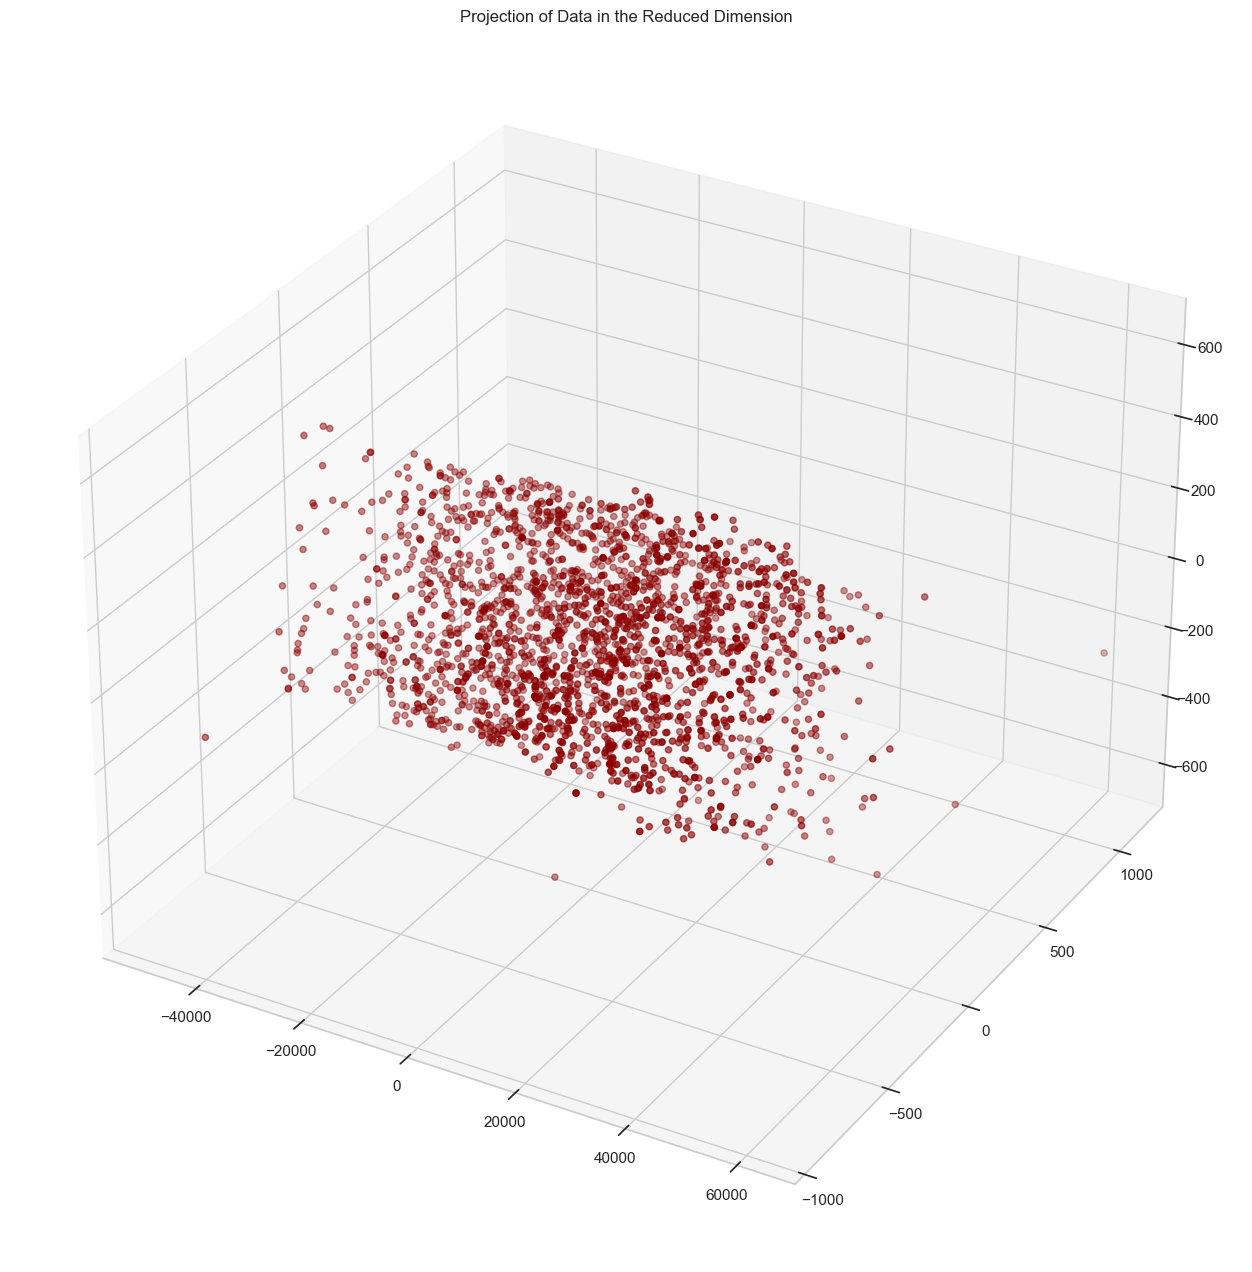

In [50]:
# 3D data visualisation in reduced dimension
x = p_components["pc1"]
y = p_components["pc2"]
z = p_components["pc3"]

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "darkred", marker = "o")
ax.set_title("Projection of Data in the Reduced Dimension")
plt.show()

## Model Building:

In [51]:
# KMeans clustering

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

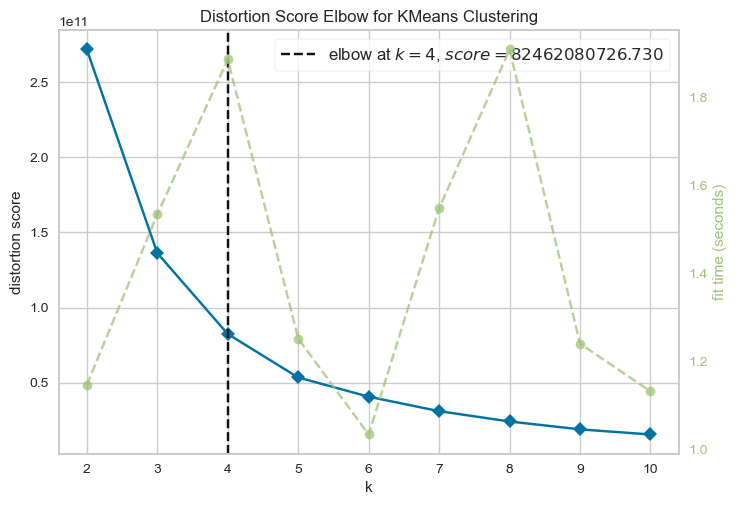

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(p_components)
elbow.show()

In [53]:
kmean = KMeans(n_clusters=4)

kmean.fit(p_components)

clusters = kmean.labels_

print(np.unique(clusters))

[0 1 2 3]


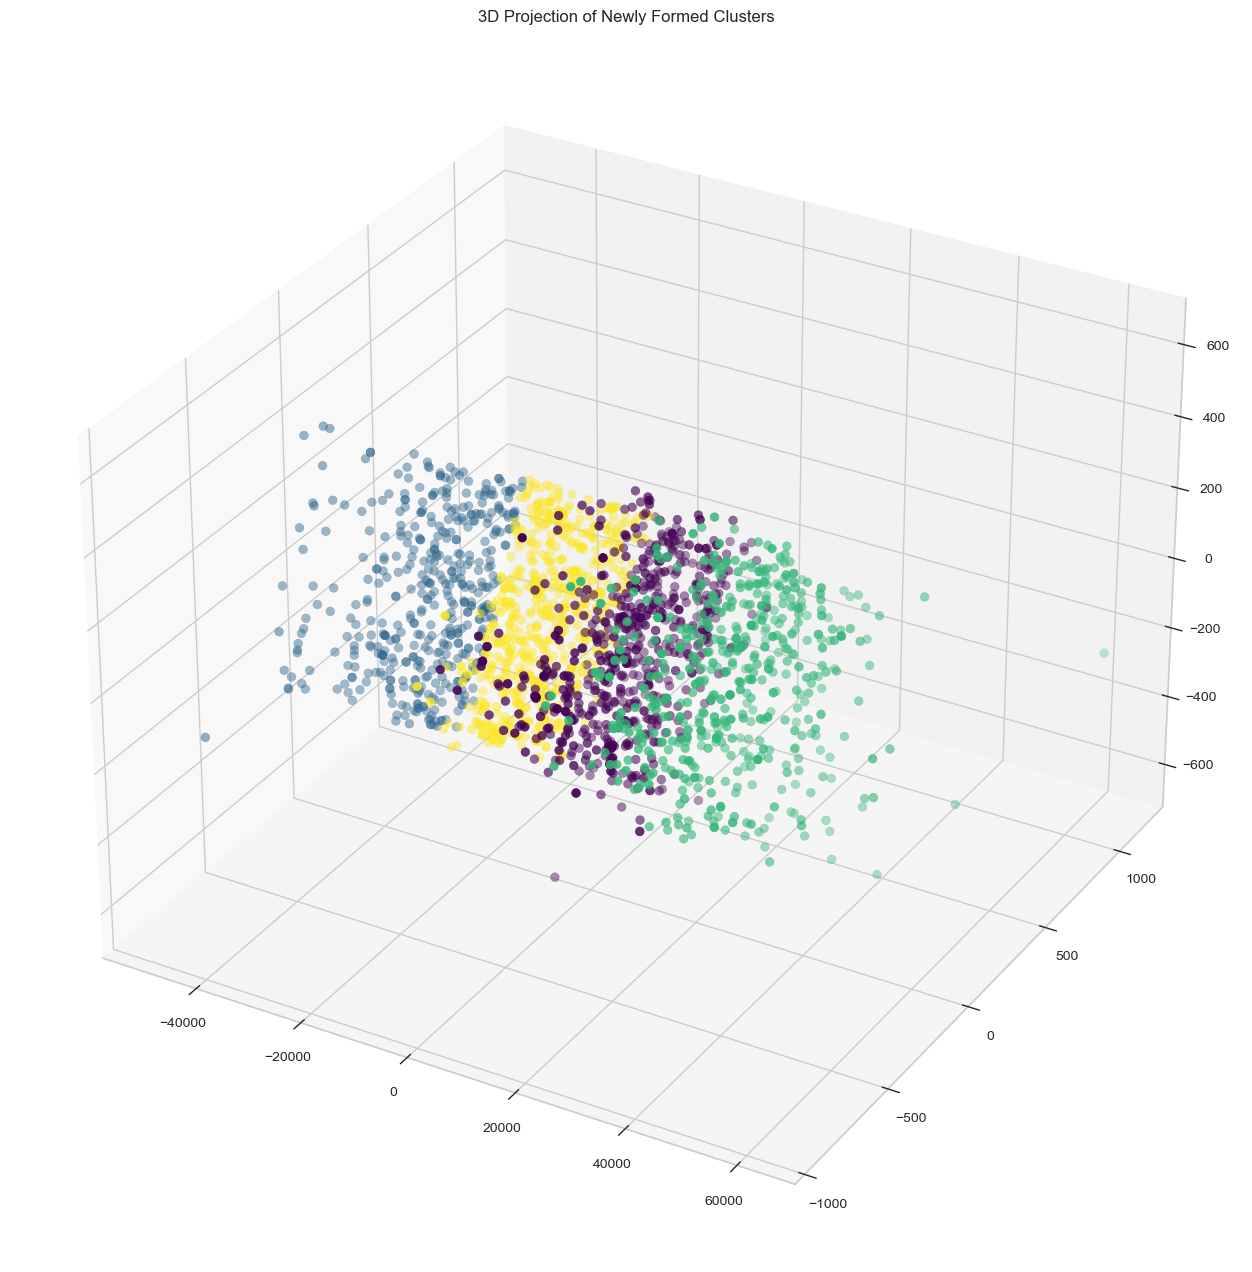

In [54]:
# Plot clusters
fig_3d = plt.figure(figsize=(18,16))
ax = plt.subplot(111, projection="3d", label="bla")
ax.scatter(x, y, z, s=40, c=clusters, marker="o", cmap='viridis')
ax.set_title("3D Projection of Newly Formed Clusters")
plt.show()

In [55]:
cluster1 = data.iloc[clusters == 0]
cluster2 = data.iloc[clusters == 1]
cluster3 = data.iloc[clusters == 2]
cluster4 = data.iloc[clusters == 3]

In [56]:
print(cluster1.Marital_Status.value_counts())
print("------------------------------------")
print(cluster1.Kids.value_counts())
print("------------------------------------")
print(f"min income: {min(cluster1.Income)}, max income: {max(cluster1.Income)}")


relationship    423
Single          213
Name: Marital_Status, dtype: int64
------------------------------------
1    384
0    122
2    113
3     17
Name: Kids, dtype: int64
------------------------------------
min income: 50611.0, max income: 69476.0


In [57]:
print(cluster2.Marital_Status.value_counts())
print("------------------------------------")
print(cluster2.Kids.value_counts())
print("------------------------------------")
print(f"min income: {min(cluster2.Income)}, max income: {max(cluster2.Income)}")

relationship    289
Single          156
Name: Marital_Status, dtype: int64
------------------------------------
1    279
0     88
2     72
3      6
Name: Kids, dtype: int64
------------------------------------
min income: 1730.0, max income: 32144.0


In [58]:
print(cluster3.Marital_Status.value_counts())
print("------------------------------------")
print(cluster3.Kids.value_counts())
print("------------------------------------")
print(f"min income: {min(cluster3.Income)}, max income: {max(cluster3.Income)}")

relationship    323
Single          192
Name: Marital_Status, dtype: int64
------------------------------------
0    364
1    127
2     20
3      4
Name: Kids, dtype: int64
------------------------------------
min income: 69508.0, max income: 113734.0


In [59]:
print(cluster4.Marital_Status.value_counts())
print("------------------------------------")
print(cluster4.Kids.value_counts())
print("------------------------------------")
print(f"min income: {min(cluster4.Income)}, max income: {max(cluster4.Income)}")

relationship    401
Single          232
Name: Marital_Status, dtype: int64
------------------------------------
1    333
2    215
0     59
3     26
Name: Kids, dtype: int64
------------------------------------
min income: 32146.0, max income: 50523.0


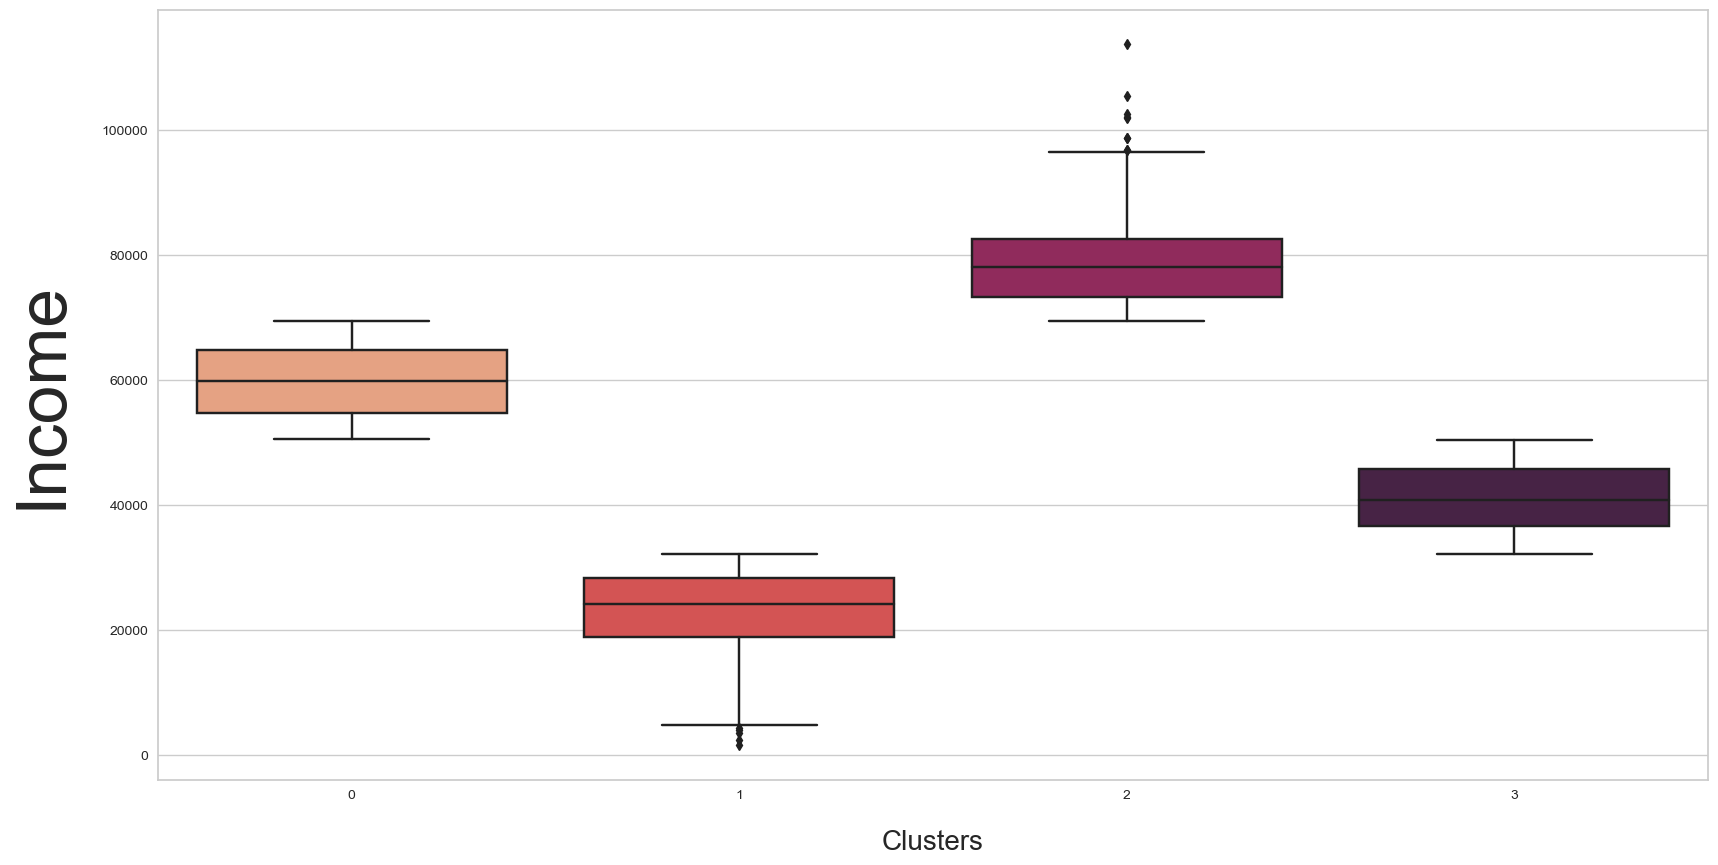

In [60]:
#Income
plt.figure(figsize=(20,10))

sns.boxplot(x=clusters, y = data['Income'],palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=50, labelpad=20);

### From above boxplots we see that clusters are divided based upon income slabs.

<Axes: xlabel='Income', ylabel='Expenses'>

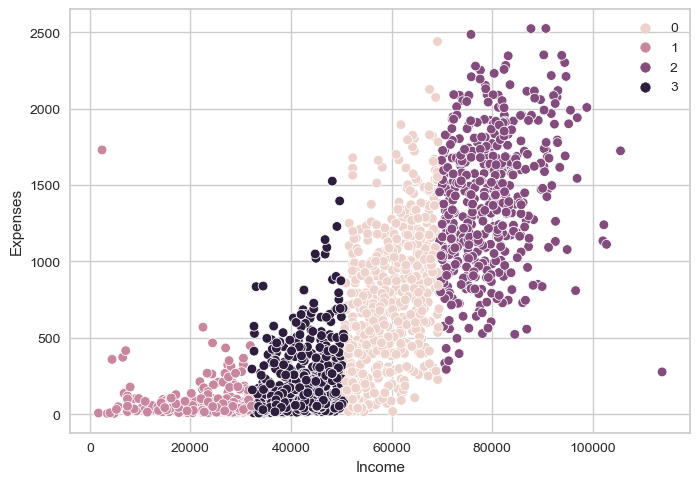

In [61]:
sns.scatterplot(x=data['Income'], y=data['Expenses'], hue=clusters)

## Spending Habits by Clusters

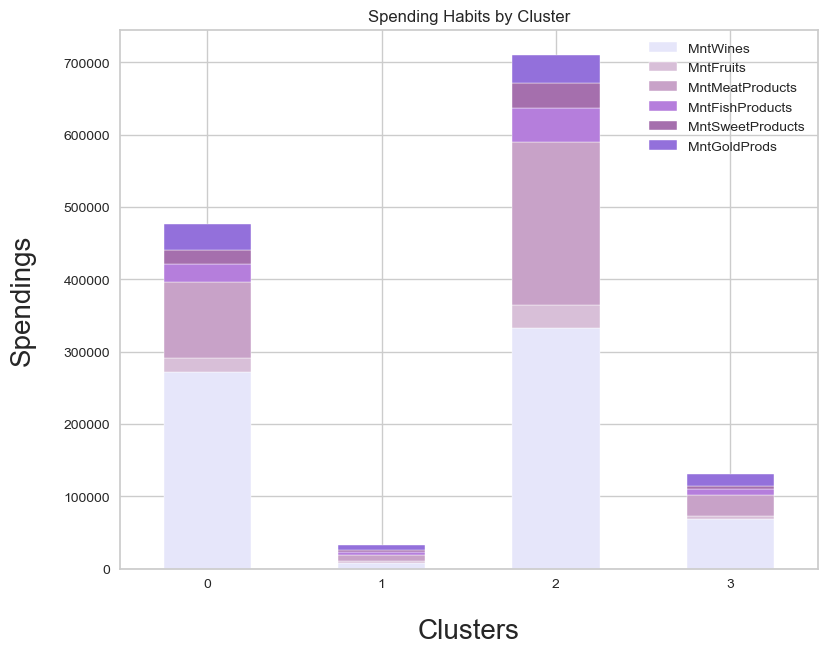

In [62]:
data["clusters"] = clusters

cluster_spendings = data.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(9,7), color=[
  "#E6E6FA",
  "#D8BFD8",
  "#C8A2C8",
  "#B57EDC",
  "#A56FAD",
  "#9370DB"
])

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

## Purchasing Habits by Clusters

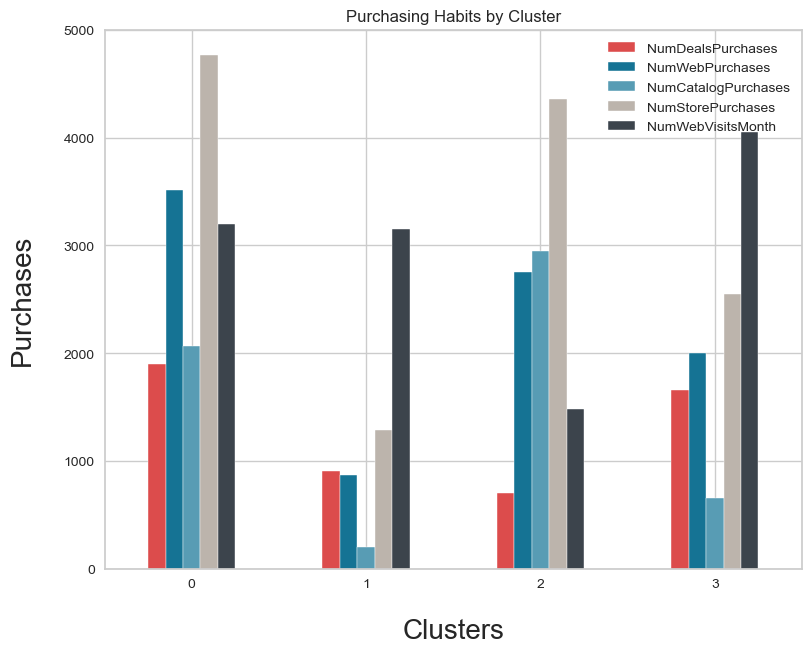

In [63]:
cluster_purchases = data.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', color=['#dc4c4c','#157394','#589cb4','#bcb4ac','#3c444c'], figsize=(9,7))

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

In [64]:

df.head()

,Education,Marital_Status,Income,Kids,Expenses,NumTotalPurchases,Age,day_engaged
0,0,0,58138.0,0,1617,25,58,849
1,0,0,46344.0,2,27,6,61,299
2,0,1,71613.0,0,776,21,50,498
3,0,1,26646.0,1,53,8,31,325
4,0,1,58293.0,1,422,19,34,347


In [65]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [66]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'NumTotalPurchases', 'Age', 'day_engaged'],
      dtype='object')

In [67]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-0.15756772, -1.34567637,  0.31603025, ...,  1.32944442,
         1.01571456,  1.52926525],
       [-0.15756772, -1.34567637, -0.25658629, ..., -1.16383787,
         1.27201959, -1.19076912],
       [-0.15756772,  0.74312073,  0.97026188, ...,  0.80454288,
         0.33223448, -0.20661123],
       ...,
       [-0.15756772, -1.34567637,  0.25985615, ...,  0.54209212,
        -1.03472567, -0.98305741],
       [-0.15756772,  0.74312073,  0.8552919 , ...,  1.06699365,
         1.10114957, -0.97811189],
       [-0.15756772,  0.74312073,  0.06021233, ..., -0.50771095,
         1.27201959,  1.32649905]])

In [68]:
# Model Building
from sklearn.cluster import DBSCAN

In [69]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([-1,  0, -1, ..., -1,  6, -1], dtype=int64)

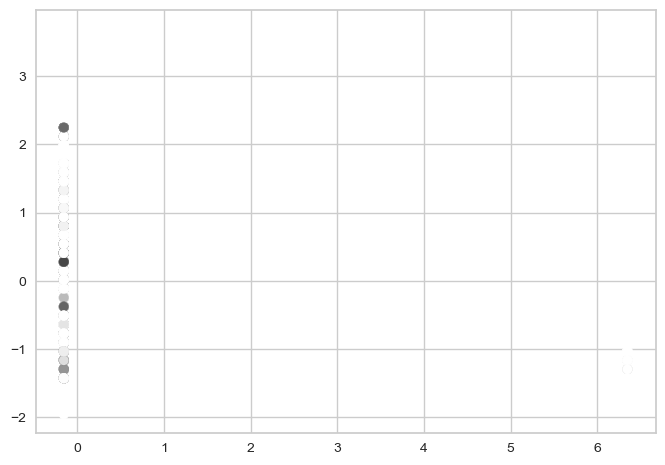

In [72]:
plt.scatter(x[:,0],x[:,5],c = y)

In [73]:
from sklearn.metrics import silhouette_score


In [74]:
silhouette_score(x,y)

-0.30150106846122215

In [75]:
#Hyperparameter
from sklearn.neighbors import NearestNeighbors

In [137]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [138]:
d,index = neigh.kneighbors(x)

In [139]:
d

array([[0.        , 0.52248286, 0.59628001],
       [0.        , 0.23809546, 0.4470536 ],
       [0.        , 0.73384872, 0.73384872],
       ...,
       [0.        , 0.64613404, 0.98611597],
       [0.        , 0.32216048, 0.36858796],
       [0.        , 0.69995491, 0.80988787]])

In [140]:
distance = np.sort(d[:,1])
distance

array([0.        , 0.        , 0.        , ..., 2.28504785, 2.71174812,
       3.00574263])

Text(0.5, 1.0, 'K-Distance Graph')

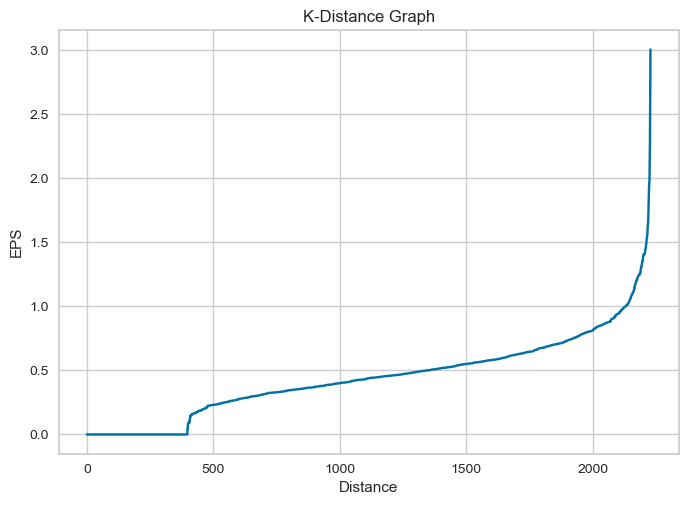

In [141]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [171]:
db = DBSCAN(eps=5,min_samples=3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [172]:
silhouette_score(x,yp)

0.5351493520624312

In [173]:
df['Cluster'] = yp
df

,Education,Marital_Status,Income,Kids,Expenses,NumTotalPurchases,Age,day_engaged,Cluster
0,0,0,58138.0,0,1617,25,58,849,0
1,0,0,46344.0,2,27,6,61,299,0
2,0,1,71613.0,0,776,21,50,498,0
3,0,1,26646.0,1,53,8,31,325,0
4,0,1,58293.0,1,422,19,34,347,0
...,...,...,...,...,...,...,...,...,...
2235,0,1,61223.0,1,1341,18,48,567,0
2236,0,1,64014.0,3,444,22,69,205,0
2237,0,0,56981.0,0,1241,19,34,341,0
2238,0,1,69245.0,1,843,23,59,342,0


In [178]:
df[df['Cluster'] == -1]

,Education,Marital_Status,Income,Kids,Expenses,NumTotalPurchases,Age,day_engaged,Cluster


In [179]:
df.groupby('Cluster').agg('mean')

,Education,Marital_Status,Income,Kids,Expenses,NumTotalPurchases,Age,day_engaged
Cluster,,,,,,,,
0,0.0,0.644598,52406.489670,0.957701,618.544368,15.063908,46.324138,537.929655
1,1.0,0.629630,20306.259259,0.722222,81.796296,7.018519,37.537037,614.203704


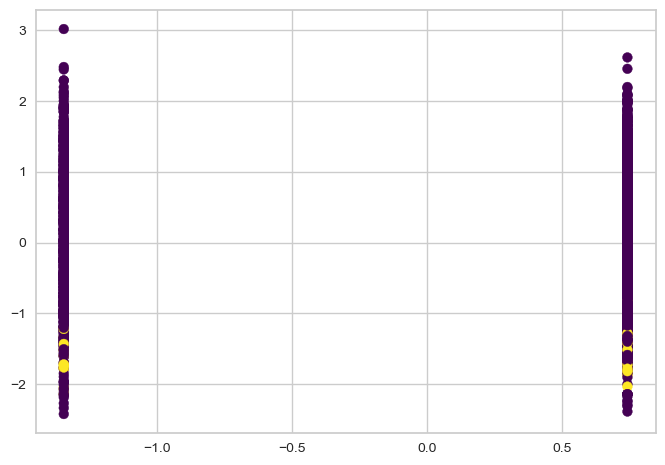

In [183]:
plt.scatter(x[:,1],x[:,2],c = yp, cmap='viridis')